In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=42)

In [3]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [4]:
print(f"R^2 на обучающем наборе: {tree.score(X_train, y_train)}")
print(f"R^2 на тестовом наборе: {tree.score(X_test, y_test)}")

R^2 на обучающем наборе: 1.0
R^2 на тестовом наборе: 0.9230769230769231


In [16]:
# Обрезанная версия дерева
tree = DecisionTreeClassifier(max_depth=2, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [17]:
print(f"R^2 на обучающем наборе: {tree.score(X_train, y_train)}")
print(f"R^2 на тестовом наборе: {tree.score(X_test, y_test)}")

R^2 на обучающем наборе: 0.9577464788732394
R^2 на тестовом наборе: 0.9090909090909091


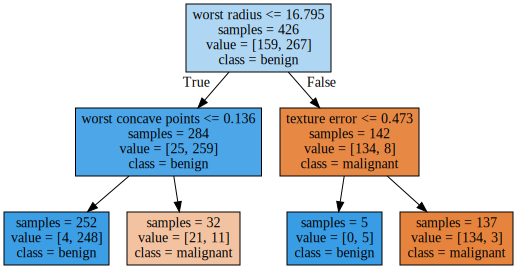

In [18]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree,
                out_file="tree.dot", 
                class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, 
                impurity=False, 
                filled=True
               )


with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

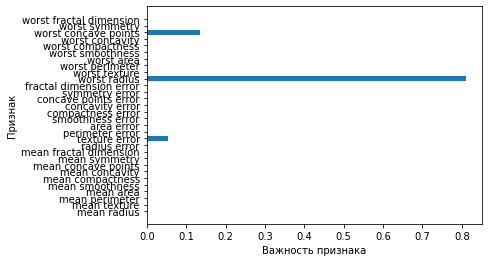

In [20]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")

plot_feature_importances_cancer(tree)